In [1]:
import scanpy as sc
import numpy as np
import spin
import os
from glob import glob

# 2nd level only

In [2]:
xkey = 'row'
ykey = 'col'
topregion_key = 'topregion'
subregion_key = 'subregion'
region_key = 'region'
topregions = list(range(17))
tissue_path = None
latent_path = None
dpi = 200

In [3]:
subdatas = []
for topregion in topregions:
    subdata = sc.read_h5ad(f'/stanley/WangLab/kamal/data/integrated/spatial/atlas/final/topregion{topregion}_subclustered.h5ad')
    subdatas.append(subdata)
adata = sc.concat(subdatas)

adata.obs[region_key] = [adata.obs[topregion_key][i]+'_'+adata.obs[subregion_key][i] for i in range(len(adata))]
adata.obs[region_key] = adata.obs[region_key].astype('category')

adata.write(f'/stanley/WangLab/kamal/data/integrated/spatial/atlas/final/atlas_spin_concat_nocombat_subclustered_final.h5ad')

In [4]:
thresh = 500
counts = adata.obs[region_key].value_counts()
good_regions = (counts > thresh)
good_regions = good_regions.index[np.where(good_regions)]
adata = adata[np.isin(adata.obs[region_key], good_regions)]

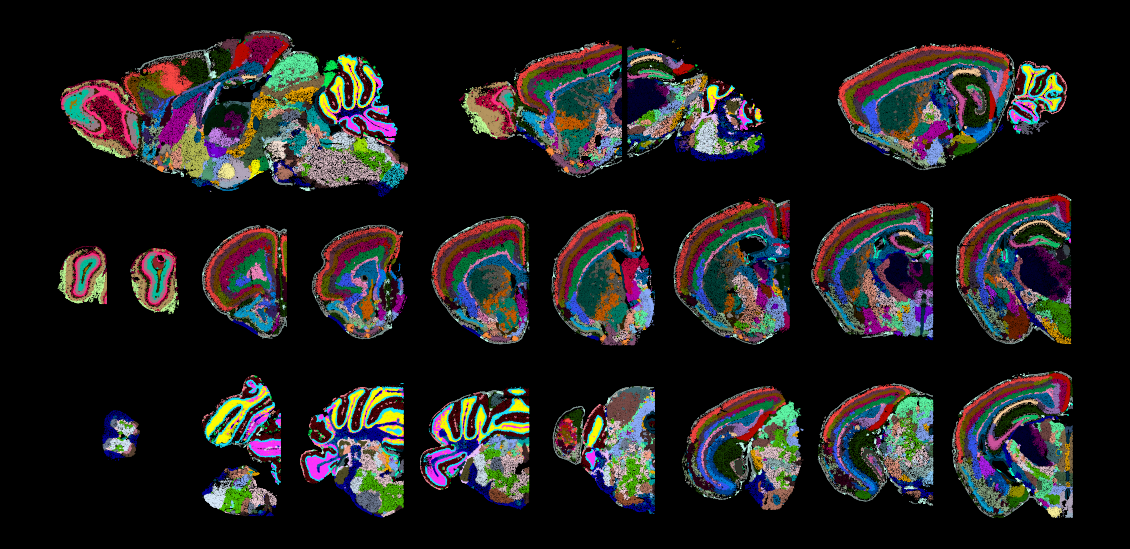

/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


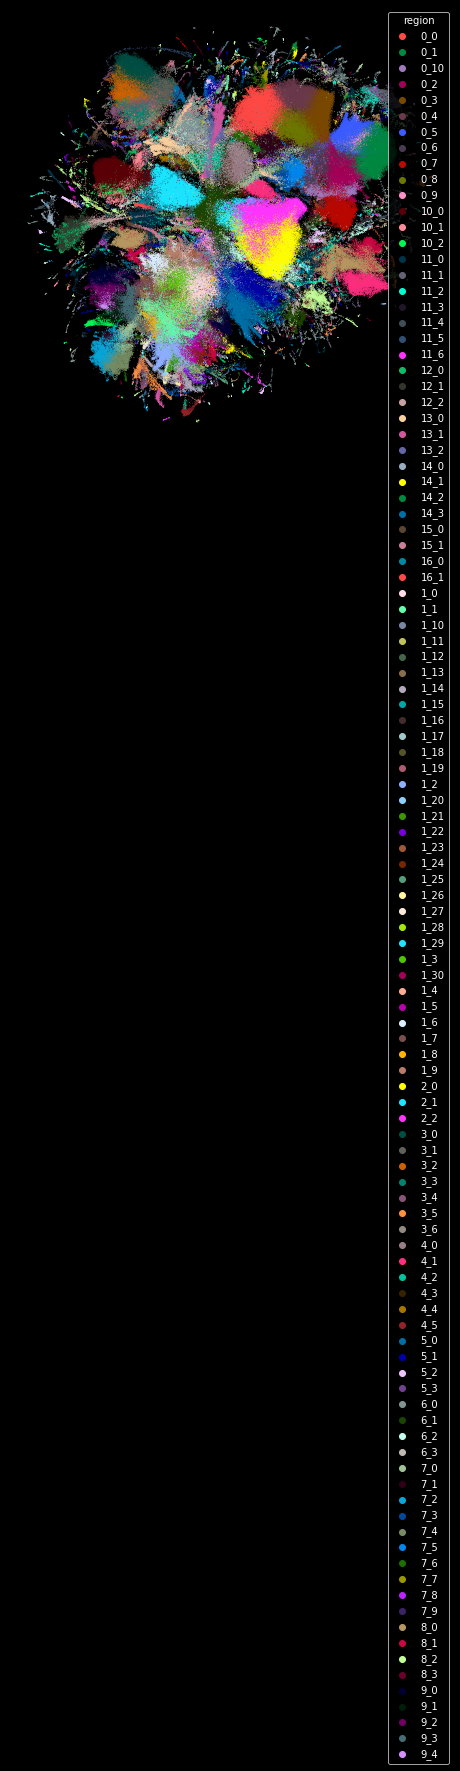

In [6]:
regions = adata.obs[region_key].value_counts().index # sorted by number of cells
palette = sc.pl.palettes.default_102*2
cmap = {regions[i]:palette[i] for i in range(len(regions))}

spin.plot_tissue(adata, colors=adata.obs[region_key], cmap=cmap, xkey=xkey, ykey=ykey, s=0.5, figscale=20, path=tissue_path, dpi=dpi)
spin.plot_latent(adata, adata.obsm['X_umap_spin'][:,0], adata.obsm['X_umap_spin'][:,1],
                    colors=adata.obs[region_key], cmap=cmap, s=0.5, legend=True, path=latent_path, dpi=dpi)

## Recluster

In [ ]:
adata = sc.read_h5ad(f'/stanley/WangLab/kamal/data/integrated/spatial/atlas/final/atlas_spin_concat_nocombat_subclustered_final.h5ad')

In [ ]:
topregion = '1'
topregion1 = adata[adata.obs['topregion']==topregion]

In [ ]:
sc.tl.leiden(adata, neighbors_key='subregion', key_added='subregion01', resolution=0.1)

# 3rd level

In [11]:
topregion_key = 'topregion'
subregion_key = 'subregion'
subsubregion_key = 'subsubregion'
region_key = 'region'
topregions = list(range(17))
tissue_path = None
latent_path = None
dpi = 200

In [16]:
subdatas = []
topregions_3rd = [1,5,11]
for topregion in topregions:
    if topregion in topregions_3rd:
        subdata = sc.read_h5ad(glob(f'/stanley/WangLab/kamal/data/integrated/spatial/atlas/topregion{topregion}/subsub_nbr_titration/topregion{topregion}_subclustered_202209*.h5ad')[0])
        subdatas.append(subdata)
    else:
        subdata = sc.read_h5ad(f'/stanley/WangLab/kamal/data/integrated/spatial/atlas/final/topregion{topregion}_subclustered.h5ad')
        subdata.obs['subsubregion'] = ['0']*len(subdata)
        subdatas.append(subdata)
adata = sc.concat(subdatas)

adata.obs['level1'] = adata.obs[topregion_key]
adata.obs['level2'] = [adata.obs[topregion_key][i]+'_'+adata.obs[subregion_key][i] for i in range(len(adata))]
adata.obs['level2'] = adata.obs['level2'].astype('category')
adata.obs['level3'] = [adata.obs[topregion_key][i]+'_'+adata.obs[subregion_key][i]+'_'+adata.obs[subsubregion_key][i] for i in range(len(adata))]
adata.obs['level3'] = adata.obs['level3'].astype('category')
del adata.obs[topregion_key]
del adata.obs[subregion_key]
del adata.obs[subsubregion_key]
del adata.obs['region']
adata.obs[['x','y']] = adata.obs[['row','col']]

adata.write(f'/stanley/WangLab/kamal/data/integrated/spatial/atlas/final/atlas_spin_concat_nocombat_subclustered_20220922.h5ad')

In [2]:
adata = sc.read_h5ad(f'/stanley/WangLab/kamal/data/integrated/spatial/atlas/final/atlas_spin_concat_nocombat_subclustered_20220922.h5ad')

In [ ]:
# thresh = 500
# counts = adata.obs[region_key].value_counts()
# good_regions = (counts > thresh)
# good_regions = good_regions.index[np.where(good_regions)]
# adata = adata[np.isin(adata.obs[region_key], good_regions)]

In [26]:
del adata.obs['region']
adata.write(f'/stanley/WangLab/kamal/data/integrated/spatial/atlas/final/atlas_spin_concat_nocombat_subclustered_20220922.h5ad')

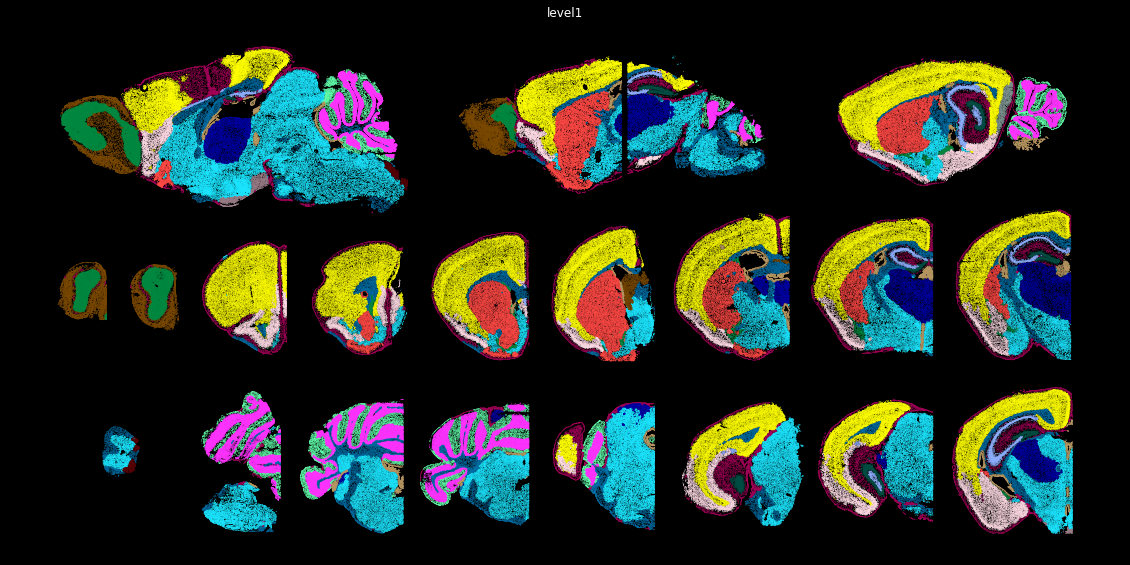

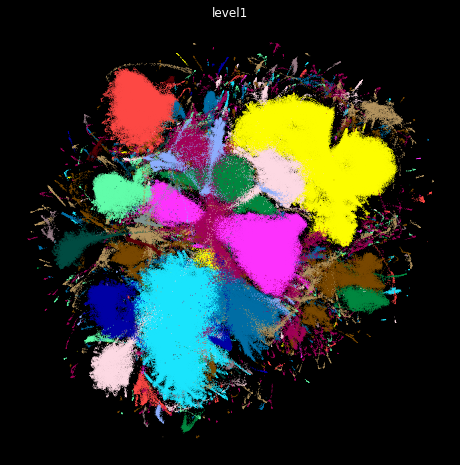

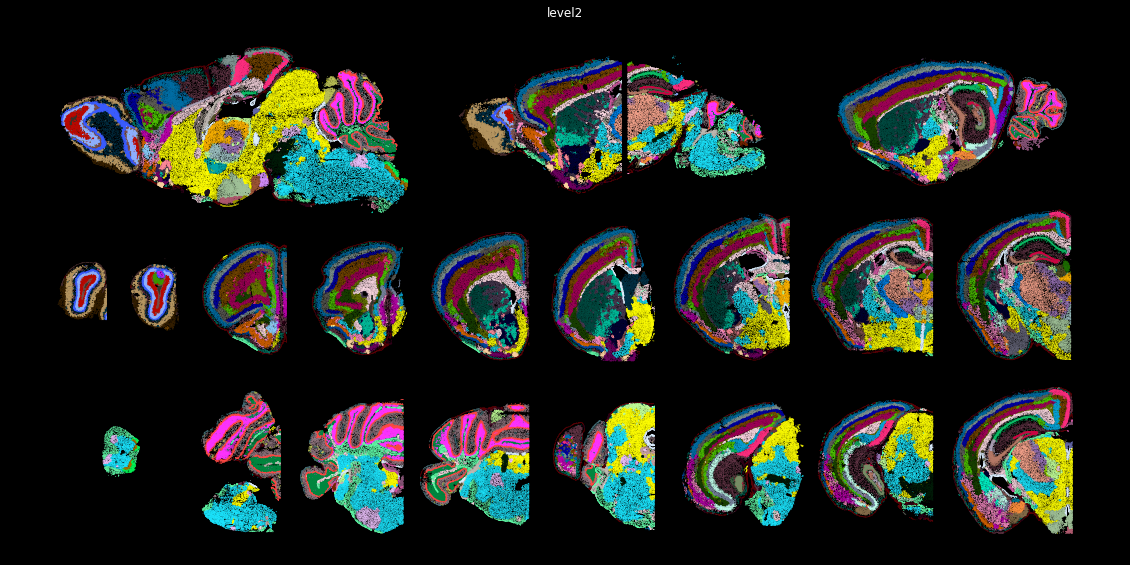

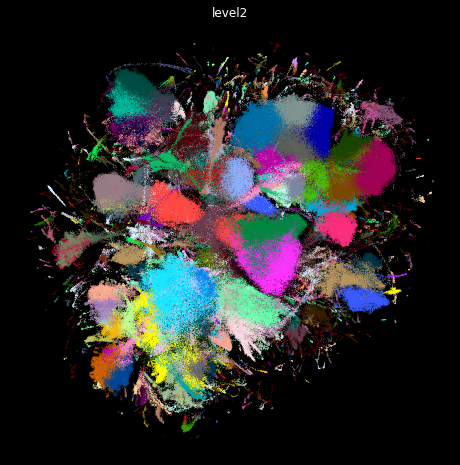

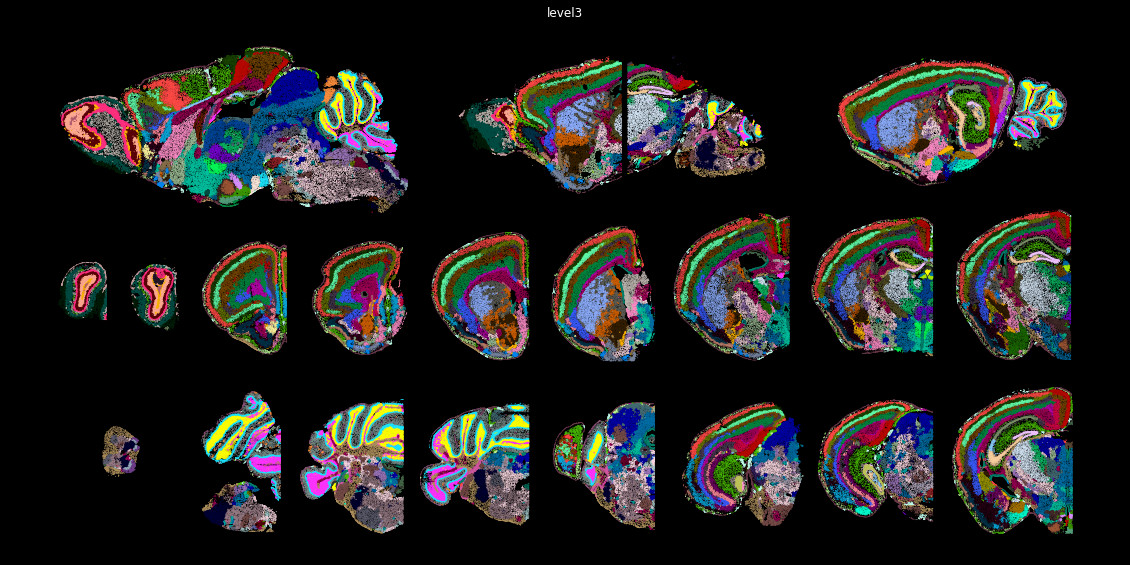

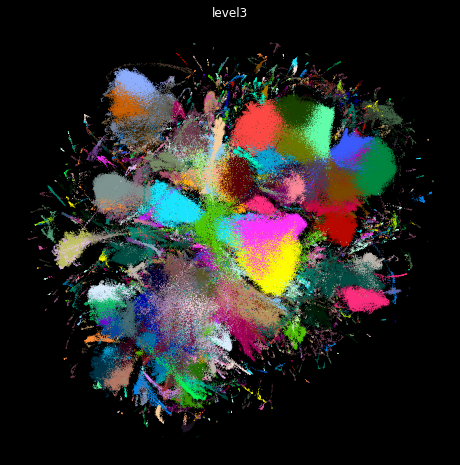

In [21]:
for key in ['level1', 'level2', 'level3']:

    regions = adata.obs[key].value_counts().index # sorted by number of cells
    palette = sc.pl.palettes.default_102*3
    cmap = {regions[i]:palette[i] for i in range(len(regions))}

    spin.plot_tissue(adata, colors=adata.obs[key], cmap=cmap, s=0.5, figscale=20, path=tissue_path, dpi=dpi, title=key)
    spin.plot_latent(adata, adata.obsm['X_umap_spin'][:,0], adata.obsm['X_umap_spin'][:,1],
                        colors=adata.obs[key], cmap=cmap, s=0.5, legend=False, path=latent_path, dpi=dpi, title=key)

In [3]:
adata_raw = sc.read_h5ad('/stanley/WangLab/kamal/data/mouse/atlas/yichun_preprocessed/atlas_arranged_for_plotting_yichun_preprocessed.h5ad')
print(len(adata_raw))
print(len(adata))
print(len(adata_raw)-len(adata))

1091527
1084885
6642


In [4]:
diff_idxs = list(set(adata_raw.obs.index) - set(adata.obs.index))

In [5]:
adata_raw.obs['removed'] = [False]*len(adata_raw)
for idx in diff_idxs:
    adata_raw.obs.at[idx, 'removed'] = True

In [6]:
spin.plot_regions_tissue(adata_raw, [True], 'removed', s=0.5, figscale=20, path=tissue_path, dpi=dpi, title=key, xkey='row', ykey='col')
# spin.plot_latent(adata, adata.obsm['X_umap_spin'][:,0], adata.obsm['X_umap_spin'][:,1],
#                     colors=adata.obs[key], cmap=cmap, s=0.5, legend=False, path=latent_path, dpi=dpi, title=key)

NameError: name 'tissue_path' is not defined

In [6]:
adata_diff = adata_raw[diff_idxs]
adata_diff.obs['level1'] = [np.nan]*len(adata_diff)
adata_diff.obs['level2'] = [np.nan]*len(adata_diff)
adata_diff.obs['level3'] = [np.nan]*len(adata_diff)

/local/scratch/36140423.1.interactive/ipykernel_30927/793319515.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_diff.obs['level1'] = [np.nan]*len(adata_diff)


In [7]:
adata.obs['removed'] = [False]*len(adata)

In [8]:
adata = sc.concat([adata, adata_diff])

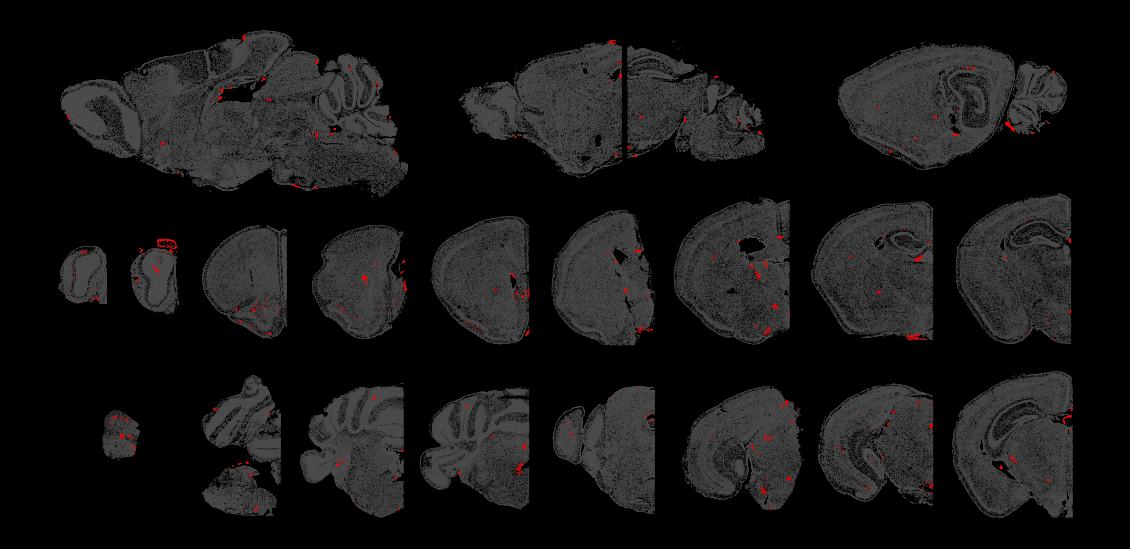

In [13]:
spin.plot_regions_tissue(adata, [True], 'removed', s=0.5, figscale=20, path=tissue_path, dpi=dpi, xkey='row', ykey='col')
# spin.plot_latent(adata, adata.obsm['X_umap_spin'][:,0], adata.obsm['X_umap_spin'][:,1],
#                     colors=adata.obs[key], cmap=cmap, s=0.5, legend=False, path=latent_path, dpi=dpi, title=key)

In [ ]:
adata.write(f'/stanley/WangLab/kamal/data/integrated/spatial/atlas/final/atlas_spin_concat_nocombat_subclustered_withremoved_20220922.h5ad')

In [ ]:
adata = sc.read_h5ad(f'/stanley/WangLab/kamal/data/integrated/spatial/atlas/final/atlas_spin_concat_nocombat_subclustered_20220922.h5ad')

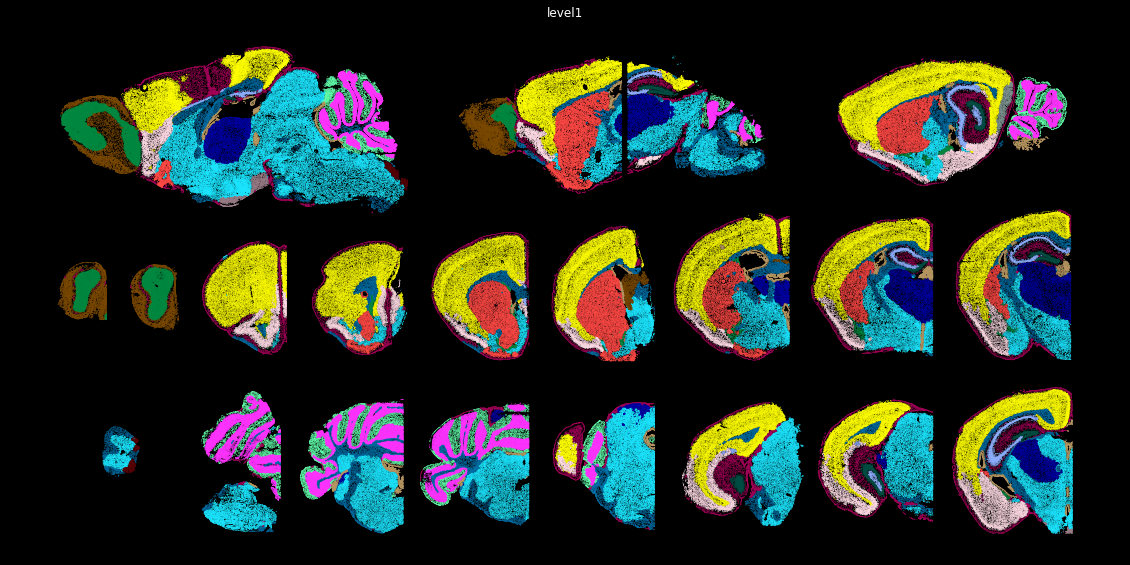

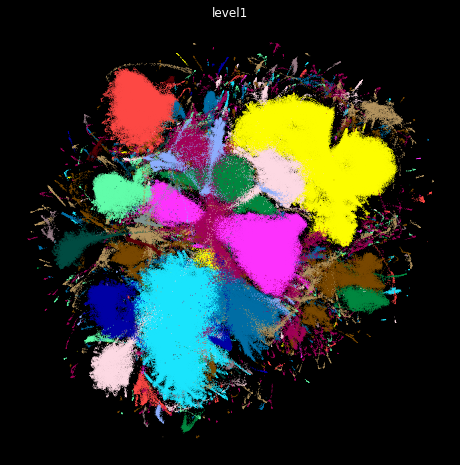

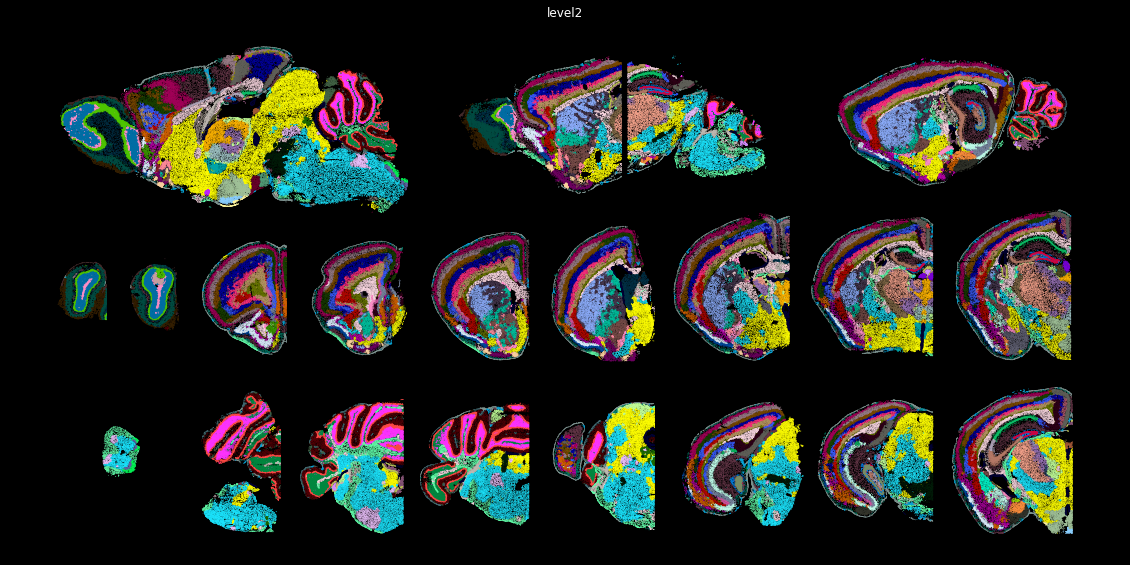

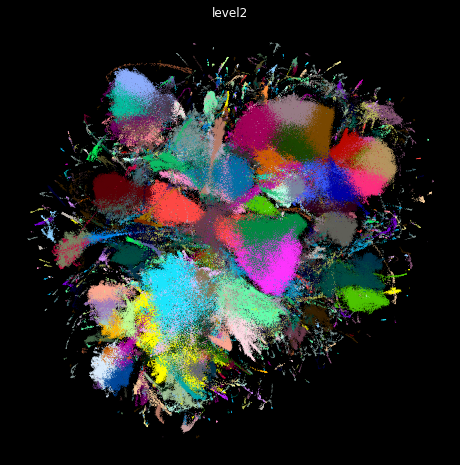

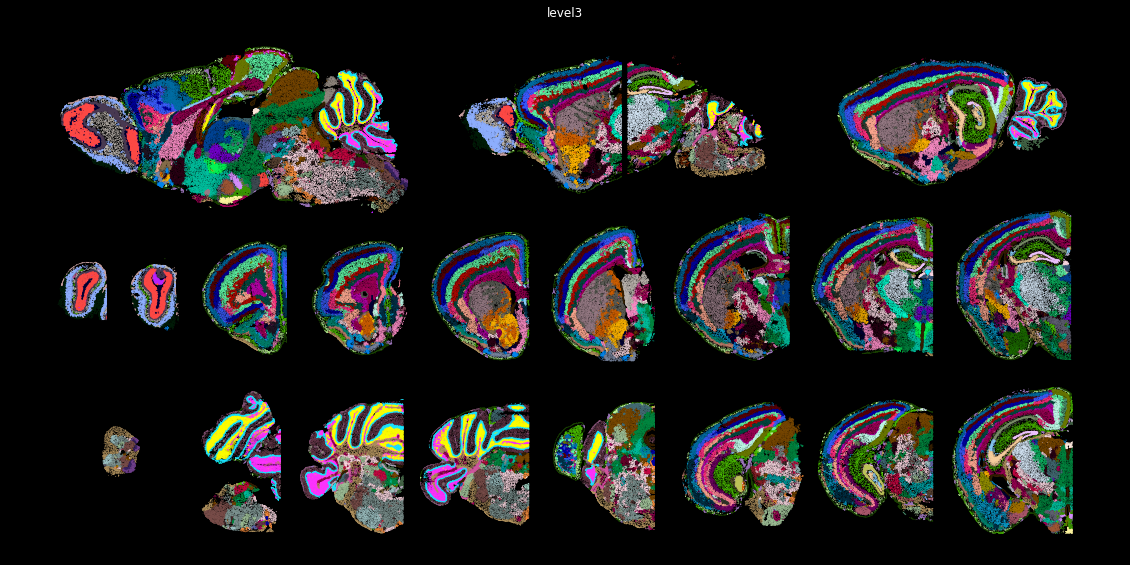

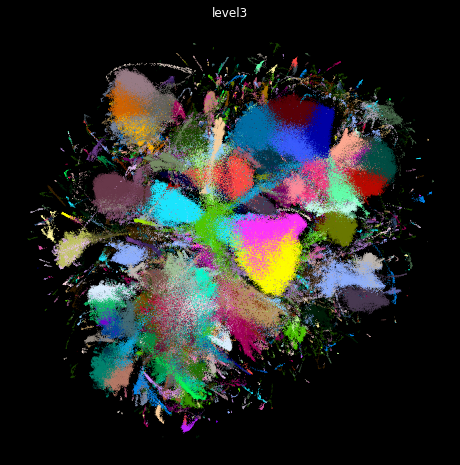

In [19]:
for key in ['level1', 'level2', 'level3']:

    regions = adata.obs[key].value_counts().index # sorted by number of cells
    palette = sc.pl.palettes.default_102*3
    cmap = {regions[i]:palette[i] for i in range(len(regions))}

    spin.plot_tissue(adata, colors=adata.obs[key], cmap=cmap, s=0.5, figscale=20, path=tissue_path, dpi=dpi, title=key, xkey='row', ykey='col')
    spin.plot_latent(adata, adata.obsm['X_umap_spin'][:,0], adata.obsm['X_umap_spin'][:,1],
                        colors=adata.obs[key], cmap=cmap, s=0.5, legend=False, path=latent_path, dpi=dpi, title=key)

# Check agreement with past subclustering

In [15]:
adata = sc.read_h5ad(f'/stanley/WangLab/kamal/data/integrated/spatial/atlas/final/atlas_spin_concat_nocombat_subclustered_20220922.h5ad')

In [16]:
subdata = adata[adata.obs['level1']=='0']

In [17]:
subdata.obs['level2'].value_counts()

0_0     32949
0_1     25276
0_2     23994
0_3     23577
0_4     21490
0_5     17446
0_6     16819
0_7     16392
0_8     16140
0_9     14736
0_10    12860
0_11     8582
0_12     3573
0_13     1265
0_14      612
0_15      277
0_16      148
0_17       87
0_18       62
0_19       59
0_20       54
0_21       48
0_22       47
0_23       46
0_24       44
0_25       37
0_26       36
0_27       28
Name: level2, dtype: int64

In [ ]:
subdata.obs['level2'].value_counts()

0_0     37732
0_1     37357
0_2     28381
0_3     24632
0_4     19533
0_5     17590
0_6     17300
0_7     16516
0_8     16057
0_9     13151
0_10     7974
0_11      275
0_12       59
0_13       51
0_14       44
0_15       32
Name: level2, dtype: int64

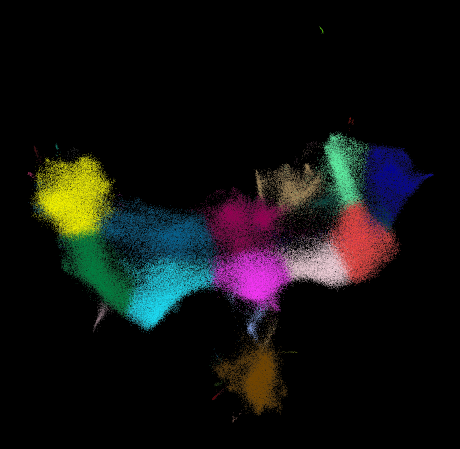

In [18]:
all_level2_regions = subdata.obs['level2'].value_counts().index
palette = sc.pl.palettes.default_102
cmap = {all_level2_regions[i]:palette[i] for i in range(len(all_level2_regions))}

spin.plot_regions_latent(subdata, 'X_umap_spin_sub', all_level2_regions, 'level2', cmap=cmap, s=0.2)

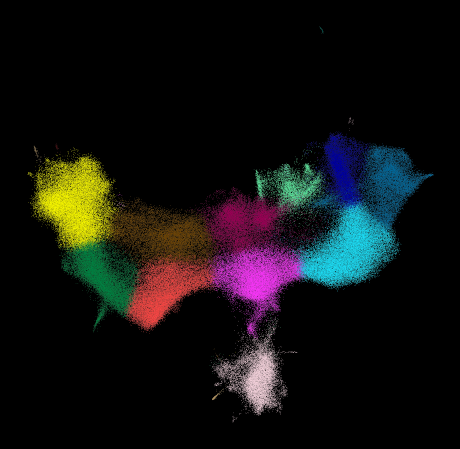

In [ ]:
all_level2_regions = subdata.obs['level2'].value_counts().index
palette = sc.pl.palettes.default_102
cmap = {all_level2_regions[i]:palette[i] for i in range(len(all_level2_regions))}

spin.plot_regions_latent(subdata, 'X_umap_spin_sub', all_level2_regions, 'level2', cmap=cmap, s=0.2)